# Сравнение средних

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

$H_0$ : среднее значение X равно некоторому известному значению m

t-статистика

\begin{equation*}
\LARGE
t = \frac{\overline{X} - m}{S_X / \sqrt{n}}
\end{equation*}

\begin{equation*}
\LARGE
s^2_X = \frac{ \sum_{t=1}^n (X_t - \overline{X})^2 }{(n - 1)}
\end{equation*}

### Одновыборочный критерий

In [3]:
data = pd.read_csv( 'data\hw_25000.csv', names = ['index', 'height_inches', 'weight_pounds'], header = 0 )
data['height'] = data['height_inches'] * 2.54
data.head()

,index,height_inches,weight_pounds,height
0,1,65.78331,112.9925,167.089607
1,2,71.51521,136.4873,181.648633
2,3,69.39874,153.0269,176.272800
3,4,68.21660,142.3354,173.270164
4,5,67.78781,144.2971,172.181037


In [4]:
data['sample'] = data['height'] + 3
data.head()

,index,height_inches,weight_pounds,height,sample
0,1,65.78331,112.9925,167.089607,170.089607
1,2,71.51521,136.4873,181.648633,184.648633
2,3,69.39874,153.0269,176.272800,179.272800
3,4,68.21660,142.3354,173.270164,176.270164
4,5,67.78781,144.2971,172.181037,175.181037


In [5]:
bins = np.linspace( 150, 190, 50 )

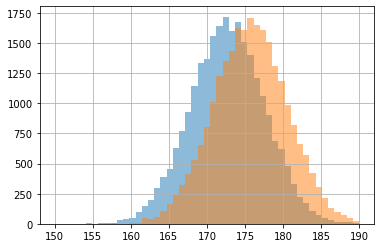

In [8]:
plt.hist( data['height'], bins, alpha = 0.5 )
plt.hist( data['sample'], bins, alpha = 0.5 )
plt.grid()
plt.show();


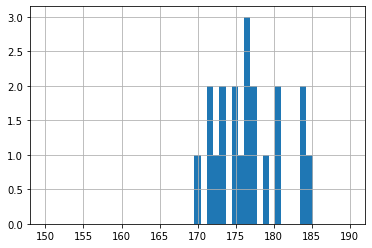

In [9]:
plt.hist( data['sample'].head(20), bins )
plt.grid()
plt.show();

In [10]:
sample = data['sample'].head(20).tolist()
sample

[170.0896074,
 184.6486334,
 179.2727996,
 176.270164,
 175.18103739999998,
 177.4925136,
 180.29718160000002,
 180.83738879999999,
 175.47273099999998,
 172.6271944,
 171.8787326,
 174.76325820000002,
 176.4882992,
 173.4760624,
 176.4303618,
 183.572664,
 171.81094,
 177.3691458,
 183.92503820000002,
 173.5131972]

In [11]:
np.mean( sample )

176.77084752999997

In [12]:
data['height'].mean()

172.70250853587314

In [13]:
stats.ttest_1samp( sample, data['height'].mean())

Ttest_1sampResult(statistic=4.325774978458577, pvalue=0.0003643469139072024)

### Двухвыборочный критерий

\begin{equation*}
\LARGE
t = \frac{ \overline{X_1} - \overline{X_2} }{(\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}
\end{equation*}

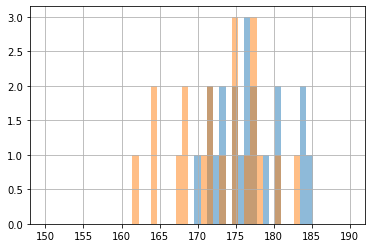

In [14]:
plt.hist( data['sample'].head(20), bins, alpha = 0.5 )
plt.hist( data['height'].tail(20), bins, alpha = 0.5 )
plt.grid()
plt.show();

In [15]:
sampleHead = data['sample'].head(20).tolist()
sampleTail = data['height'].tail(20).tolist()

In [16]:
sampleHead

[170.0896074,
 184.6486334,
 179.2727996,
 176.270164,
 175.18103739999998,
 177.4925136,
 180.29718160000002,
 180.83738879999999,
 175.47273099999998,
 172.6271944,
 171.8787326,
 174.76325820000002,
 176.4882992,
 173.4760624,
 176.4303618,
 183.572664,
 171.81094,
 177.3691458,
 183.92503820000002,
 173.5131972]

In [17]:
sampleTail

[177.29001879999998,
 168.4046416,
 173.64072460000003,
 162.00036179999998,
 171.67095460000002,
 177.0783098,
 174.78479140000002,
 174.92456760000002,
 167.89747979999999,
 178.1007106,
 177.74328179999998,
 182.66806240000003,
 180.2439372,
 168.1343348,
 170.7166004,
 176.535461,
 163.9525804,
 164.334317,
 171.52411720000003,
 174.9491294]

In [18]:
stats.ttest_ind( sampleHead, sampleTail )

Ttest_indResult(statistic=2.4971105935874616, pvalue=0.016971440748776375)